<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-описание" data-toc-modified-id="Цели-и-описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и описание</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчета и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Суммарные-затраты" data-toc-modified-id="Суммарные-затраты-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Суммарные затраты</a></span></li><li><span><a href="#Средние-затраты-на-одного-пользователя" data-toc-modified-id="Средние-затраты-на-одного-пользователя-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Средние затраты на одного пользователя</a></span></li></ul></li><li><span><a href="#Окупаемость-рекламы" data-toc-modified-id="Окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Окупаемость рекламы</a></span><ul class="toc-item"><li><span><a href="#Общая-окупаемость" data-toc-modified-id="Общая-окупаемость-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Общая окупаемость</a></span></li><li><span><a href="#Окупаемость-по-рекламным-каналам" data-toc-modified-id="Окупаемость-по-рекламным-каналам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Окупаемость по рекламным каналам</a></span></li><li><span><a href="#Окупаемость-по-странам" data-toc-modified-id="Окупаемость-по-странам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Окупаемость по странам</a></span></li><li><span><a href="#Окупаемость-по-устройствам" data-toc-modified-id="Окупаемость-по-устройствам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Окупаемость по устройствам</a></span></li><li><span><a href="#Конверсия-и-удержание" data-toc-modified-id="Конверсия-и-удержание-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Конверсия и удержание</a></span><ul class="toc-item"><li><span><a href="#Конверсия" data-toc-modified-id="Конверсия-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Конверсия</a></span></li><li><span><a href="#Удержание" data-toc-modified-id="Удержание-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Удержание</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Анализ бизнес-показателей приложения

## Цели и описание

Заказчик -  развлекательное приложение Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.  
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.  

Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.  

В ходе исследования будут проанализированы основные показатели эффективности, такие как конверсия, окупаемость, удержание и затраты. Горизонт анализа - 14 дней, анализ данных происходит по состоянию на 1 ноября 2019 года.

### Обзор данных

Импорт библиотек:

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Распаковка файла. Используем два пути - для открытия с локальной машины и с сервера:

In [2]:
try:
    costs = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_6_application_marketing_research\costs_info_short.csv')
except:
    costs = pd.read_csv('/datasets/costs_info_short.csv')

try:
    orders = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_6_application_marketing_research\orders_info_short.csv')
except:
    orders = pd.read_csv('/datasets/orders_info_short.csv')

try:
    visits = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_6_application_marketing_research\visits_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
def prep(data):
    '''
    Функция для вывода информации о датасете
    
    Принимает на вход датасет, на выходе выдает 10 первых строк датасета для предварительного просмотра,
    выводит общую информацию о количестве строк и типах данных, описание квартилей и средних для числовых значений,
    а также считает пропущенные значения в случае их наличия.
    '''
    display(data.head(10))
    print('-------------------------------------------------------------------------------------------------------------------')
    print('Общая информация')
    print(data.info())
    print('-------------------------------------------------------------------------------------------------------------------')
    print(data.describe())
    print('-------------------------------------------------------------------------------------------------------------------')
    print('Количество пропусков')
    print(data.isna().sum())

list_of_data = [costs, orders, visits]

for df in list_of_data:
    prep(df)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
-------------------------------------------------------------------------------------------------------------------
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000
-------------------------------------------------------------------------------------------------------------------
Количество пропусков
dt         0
Channel    0
costs      0
dtype: int64


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
-------------------------------------------------------------------------------------------------------------------
            User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000
-------------------------------------------------------------------------

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
-------------------------------------------------------------------------------------------------------------------
            User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11
-----------------------------------------------------

Предварительный просмотр показал, что ни в одном из датафреймов не обнаружилось пропусков, однако потребуется повторная проверка после обработки данных. Все столбцы, содержащие даты, находятся в формате `object`, требуется перевести их в `datetime`, для того, чтобы с датами можно было работать.  
Таблицы `costs` и `orders`, содержащие числовые значения, проверим на наличие выбросов, т.к. максимальные значения достаточно сильно отличаются от средних.

### Предобработка данных

Приведем наименования столбцов к единому стилю. Поскольку нужно только привести все наименования к строчным символам и заменить пробел на нижнее подчеркивание, можно пройтись циклом по списку датафреймов:

In [4]:
for i in list_of_data:
    i.columns = i.columns.str.lower().str.replace(' ', '_')

Преобразуем колонки с датами в формат `datetime`:

In [5]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Для таблиц с данными типа `object` проверим, нет ли неявных дублей в этих значениях. Все такие данные находятся в разных колонках, поэтому проверим их вручную по отдельности:

In [6]:
costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

In [7]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [8]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [9]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Построим `boxplot` для визуализации распределения числовых данных и определим, есть ли выбросы:

In [10]:
sns.set_style('darkgrid') # сразу установим единый стиль для всех графиков
sns.set_palette('Set2') # устанавливаем общую палитру

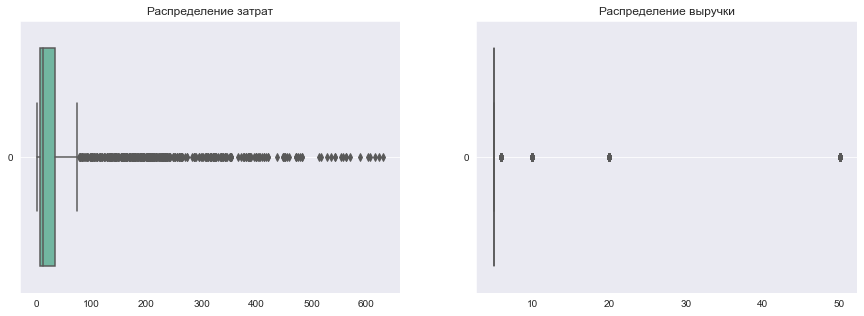

In [11]:
# задаем область для двух графиков
fig,ax = plt.subplots(figsize = (15,5))
# строим первый boxplot для распределения затрат и задаем заголовок
sns.boxplot(data=costs['costs'], ax = plt.subplot(1,2,1), orient = 'h')
plt.grid()
plt.title('Распределение затрат')
# аналогично строим второй boxplot для выручки
sns.boxplot(data=orders['revenue'], ax = plt.subplot(1,2,2), orient = 'h')
plt.grid()
plt.title('Распределение выручки')
plt.show()

Затраты распределяются достаточно равномерно, а в столбце с выручкой, очевидно, повторяются одинаковые значения. Разница в значениях вызвана не наличием выбросов в данных, а разницей в стоимости каких-либо платных функций в приложении (например, подписки). Соответственно, отфильтровывать выбивающиеся значения не требуется.  
Для информации выведем доступную стоимость функций:

In [12]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

В этом разделе использованы функции из теоретической части обучения.

In [13]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [17]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Получим пользовательские профили:

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим максимальную и минимальную даты привлечения:

In [22]:
max_date = profiles['dt'].max()
print(f'Максимальная дата:', max_date)
min_date = profiles['dt'].min()
print(f'Минимальная дата:', min_date)

Максимальная дата: 2019-10-27
Минимальная дата: 2019-05-01


Полученные даты совпадают с условиями ТЗ, лишних или недостающих дней нет.

Определим, какова доля платящих пользователей в разбивке по различным параметрам: страна, устройство, источник:

In [23]:
def get_ratio(df, parameters):
    '''
    Функция для расчета доли платящих пользователей
    
    Принимает на вход датафрейм и список параметров, строит сводную таблицу по каждому параметру,
    рассчитывает количество пользователей в каждой группе и долю платящих среди них.
    В столбце payer находятся 0 и 1, поэтому можно рассчитать долю как среднее арифметическое - сумма значений,
    деленная на количество значений
    '''
    for i in parameters:
        pivot = df.pivot_table(index = parameters[i], values = 'payer', aggfunc = ['count', 'mean']).reset_index()
        pivot.columns = [i, 'count', 'ratio']
        pivot = pivot.sort_values(by='ratio', ascending = False)
        display(pivot)

In [24]:
parameters = profiles[['region', 'device', 'channel']]

In [25]:
get_ratio(profiles, parameters)

,region,count,ratio
3,United States,100002,0.069019
1,Germany,14981,0.041119
2,UK,17575,0.039829
0,France,17450,0.037994


,device,count,ratio
1,Mac,30042,0.063644
3,iPhone,54479,0.062079
0,Android,35032,0.058518
2,PC,30455,0.050468


,channel,count,ratio
1,FaceBoom,29144,0.122049
0,AdNonSense,3880,0.113402
9,lambdaMediaAds,2149,0.104700
6,TipTop,19561,0.096007
5,RocketSuperAds,4448,0.079137
7,WahooNetBanner,8553,0.052964
8,YRabbit,4312,0.038265
3,MediaTornado,4364,0.035747
2,LeapBob,8553,0.030633
4,OppleCreativeMedia,8605,0.027077


В таблице есть данные по пользователям из 4 стран. Наибольшее количество пользователей находится в США, и там же самая большая доля платящих пользователей. На втором месте находится Германия, при том, что количество пользователей там минимальное по сравнению с другими странами.  
Проверим, есть ли разница в используемых устройствах.

Доля платящих пользователей среди устройств Mac и iPhone очень близки, но при этом количество покупателей, использующих iPhone, значительно превышает количество пользователей в остальных группах.  
Построим аналогичную таблицу по источникам привлечения:

По количеству пользователей лидирует органический трафик, т.е. люди, которые самостоятельно нашли приложение с помощью поисковых систем. Это хороший показатель, ведь это означает, что критерии поиска (ключевые слова и т.д.) настроены правильно, раз пользователи могут нас найти. Но вот доля платящих пользователей среди этой группы ожидаемо минимальна, а наибольшая доля у источников FaceBoom, AdNonSense и lambdaMediaAds. Возможно, эти ресурсы являются наиболее перспективными с точки зрения размещения рекламы.

## Маркетинг

### Суммарные затраты

Посмотрим, как затраты распределялись во времени. Выделим месяц и неделю и построим сводную таблицу с суммарными расходами.

In [26]:
# преобразовываем в формат datetime
costs['dt'] = pd.to_datetime(costs['dt'])
# выделяем из даты месяц
costs['month'] = costs['dt'].dt.month
# выделяем номер календарной недели
costs['week'] = costs['dt'].dt.isocalendar().week
costs.head()

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


Сгруппируем данные по месяцу и по неделе и построим графики:

In [27]:
# формируем сводную таблицу по месяцам
costs_month = costs.pivot_table(index = 'month',
                                columns = 'channel',
                                values = 'costs',
                                aggfunc = 'sum')
costs_month

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
10,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


In [28]:
# формируем сводную таблицу по неделям
costs_week = costs.pivot_table(index = 'week',
                               columns = 'channel',
                               values = 'costs',
                               aggfunc = 'sum')
costs_week.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


Строим графики для визуализации по месяцам и неделям:

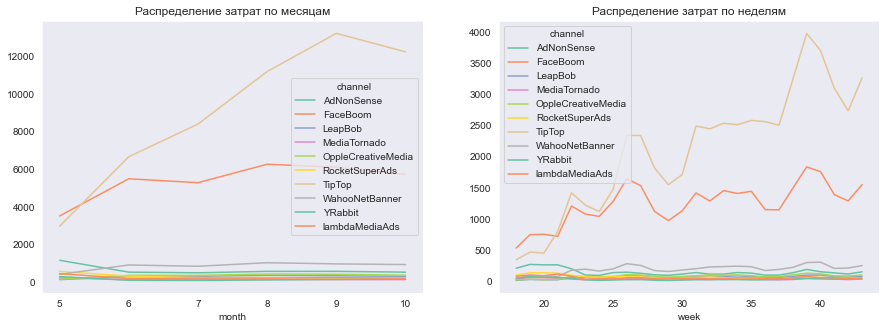

In [29]:
fig,ax = plt.subplots(figsize = (15,5))
costs_month.plot(ax = plt.subplot(1,2,1))
plt.grid()
plt.title('Распределение затрат по месяцам')
costs_week.plot(ax = plt.subplot(1,2,2))
plt.grid()
plt.title('Распределение затрат по неделям')
plt.show()

По большинству источников затраты распределяются равномерно, но два источника сильно выделяются: `Tip Top` и `FaceBoom`. Затраты по этим двум ресурсам превышают все остальные на старте и с течением времени растут, а вот источник `AdNonSense` демонстрирует даже некоторое снижение суммарных затрат.

Рассчитаем общую сумму расходов на маркетинг с процентной разбивкой по источникам:

In [30]:
total_cac = costs.pivot_table(index = 'channel', values = 'costs', aggfunc = 'sum').reset_index()
total_cac['ratio'] = (total_cac['costs'] / total_cac['costs'].sum()) * 100
total_cac.sort_values(by = 'ratio', ascending = False)

,channel,costs,ratio
6,TipTop,54751.30,51.898295
1,FaceBoom,32445.60,30.754910
7,WahooNetBanner,5151.00,4.882589
0,AdNonSense,3911.25,3.707441
4,OppleCreativeMedia,2151.25,2.039152
5,RocketSuperAds,1833.00,1.737485
2,LeapBob,1797.60,1.703930
9,lambdaMediaAds,1557.60,1.476436
3,MediaTornado,954.48,0.904744
8,YRabbit,944.22,0.895018


### Средние затраты на одного пользователя

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Данные по затратам на привлечение одного пользователя есть в таблице с профилями.  
Для отображения динамики сгруппируем таблицу `profiles` по месяцам и источникам привлечения и рассчитаем среднее.

In [31]:
profiles['month'] = pd.to_datetime(profiles['month']).dt.date
avg_cac = profiles.pivot_table(index = 'channel', columns = 'month', values = 'acquisition_cost').T.reset_index()
avg_cac

channel,month,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
0,2019-05-01,1.027856,1.105868,0.201842,0.226768,0.243544,0.549411,1.357468,0.577655,0.281144,0.753947,0.0
1,2019-06-01,1.012500,1.116748,0.211696,0.218354,0.249831,0.498798,2.077684,0.598441,0.182788,0.732353,0.0
2,2019-07-01,0.992126,1.113652,0.209859,0.215365,0.251544,0.417334,2.650552,0.607709,0.161493,0.721053,0.0
3,2019-08-01,0.995876,1.112088,0.210478,0.224325,0.250142,0.354000,3.011290,0.605941,0.191908,0.694006,0.0
4,2019-09-01,1.004663,1.114434,0.210385,0.210962,0.250586,0.302493,3.480405,0.601477,0.213992,0.714451,0.0
5,2019-10-01,0.993715,1.114316,0.212261,0.211722,0.250829,0.293056,3.543535,0.609314,0.234112,0.707285,0.0


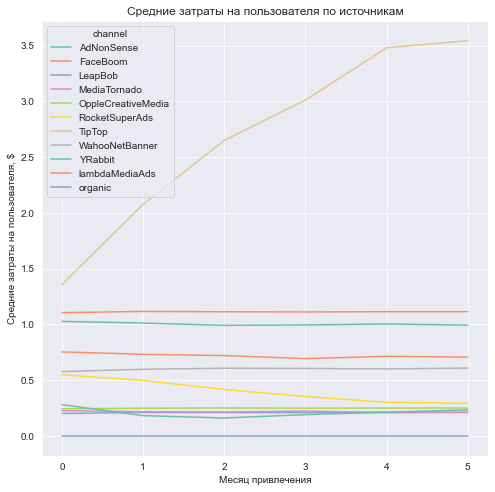

In [32]:
fig,ax = plt.subplots(figsize = (8,8))
avg_cac.plot(ax = ax, grid = True)
plt.title('Средние затраты на пользователя по источникам')
plt.xlabel('Месяц привлечения')
plt.ylabel('Средние затраты на пользователя, $')
plt.show()

По распределению средних затрат на одного пользователя видим ту же картину, что и в предыдущем пункте: затраты распределяются равномерно по большинству источников. По источнику `TipTop` затраты превышают все остальные и увеличиваются со временем, а вот источник `FaceBoom` по затратам на одного пользователя стабилен, хотя и находится на втором месте по стоимости. Примечательно, что затраты на отдельного пользователя по источнику `RocketSuperAds` со временем снижаются, хотя снижения суммарных затрат в предыдущем пункте мы не видим. Источник `AdNonSense`, демонстрирующий снижение суммарных затрат, по затратам на одного пользователя стабилен.  
Нужно выяснить, оправданы ли такие высокие затраты на `TipTop`, а также, какую выручку приносят все остальные источники привлечения.

Рассчитаем среднюю стоимость привлечения на одного пользователя для всего проекта и для каждого источника трафика. Исходя из того, что CAC считается как отношение затрат на рекламу к размеру когорты, средний CAC по всему проекту можно рассчитать, разделив суммарные затраты на общее количество пользователей. Органический трафик отсекаем:

In [33]:
# фильтруем пользователей
inorganic = profiles.query('channel != "organic"')
total_avg_cac = inorganic['acquisition_cost'].sum() / inorganic.agg({'user_id': 'nunique'})
total_avg_cac

user_id    1.127481
dtype: float64

Сумма получилась действительно средняя, с учетом того, насколько разные затраты по источникам траффика, а насколько они разные отобразим в таблице ниже. Отдельно считаем количество уникальных пользователей по каждому источнику:

In [34]:
users_by_channel = inorganic.pivot_table(index = 'channel',
                                         values = 'user_id',
                                         aggfunc = 'nunique').reset_index()

Построим таблицу по средним затратам на пользователя в разрезе источников, рассчитаем долю платящих пользователей и объединим с полученной таблицей с уникальными пользователями.

In [35]:
# строим таблицу по средним затратам на пользователя в разрезе источников
cac_by_channel = inorganic.pivot_table(index = 'channel',
                                       values = ['payer', 'acquisition_cost'],
                                       aggfunc = 'mean').reset_index()
# объединяем с таблицей с уникальными пользователями по источникам
cac_by_channel = cac_by_channel.merge(users_by_channel, on = 'channel')
# переводим долю в проценты
cac_by_channel['payer'] = cac_by_channel['payer'] * 100
cac_by_channel.columns = ['channel', 'avg_acquisition_cost', 'payers_percentage', 'quantity_of_users']
cac_by_channel.sort_values(by = 'avg_acquisition_cost', ascending = False)

,channel,avg_acquisition_cost,payers_percentage,quantity_of_users
6,TipTop,2.799003,9.600736,19561
1,FaceBoom,1.113286,12.204914,29144
0,AdNonSense,1.008054,11.340206,3880
9,lambdaMediaAds,0.724802,10.469986,2149
7,WahooNetBanner,0.602245,5.296387,8553
5,RocketSuperAds,0.412095,7.913669,4448
4,OppleCreativeMedia,0.250000,2.707728,8605
8,YRabbit,0.218975,3.826531,4312
3,MediaTornado,0.218717,3.574702,4364
2,LeapBob,0.210172,3.063253,8553


## Окупаемость рекламы

### Общая окупаемость

Проанализируем окупаемость рекламы с учетом вводных: на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.  
Как было выяснено ранее, количество "органических" пользователей превышает всех остальных и составляет примерно половину всех пользователей, но платящих среди них меньше всего. Исключим эту группу из дальнейшего анализа, т.к. они будут искажать результаты из-за многочисленности и того, что затраты на них равны 0.

In [36]:
profiles_filtered = profiles.query('channel != "organic"')

Определим момент и горизонт анализа:

In [37]:
observation_date = datetime(2019,11,1).date()
horizon_days = 14

С помощью функции `get_ltv` построим таблицы LTV и ROI:

In [38]:
result, ltv, ltv_dynamics, roi, roi_dynamics = get_ltv(profiles_filtered, orders, observation_date, horizon_days)

In [39]:
ltv

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


In [40]:
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


Визуализируем полученные данные с помощью функции:

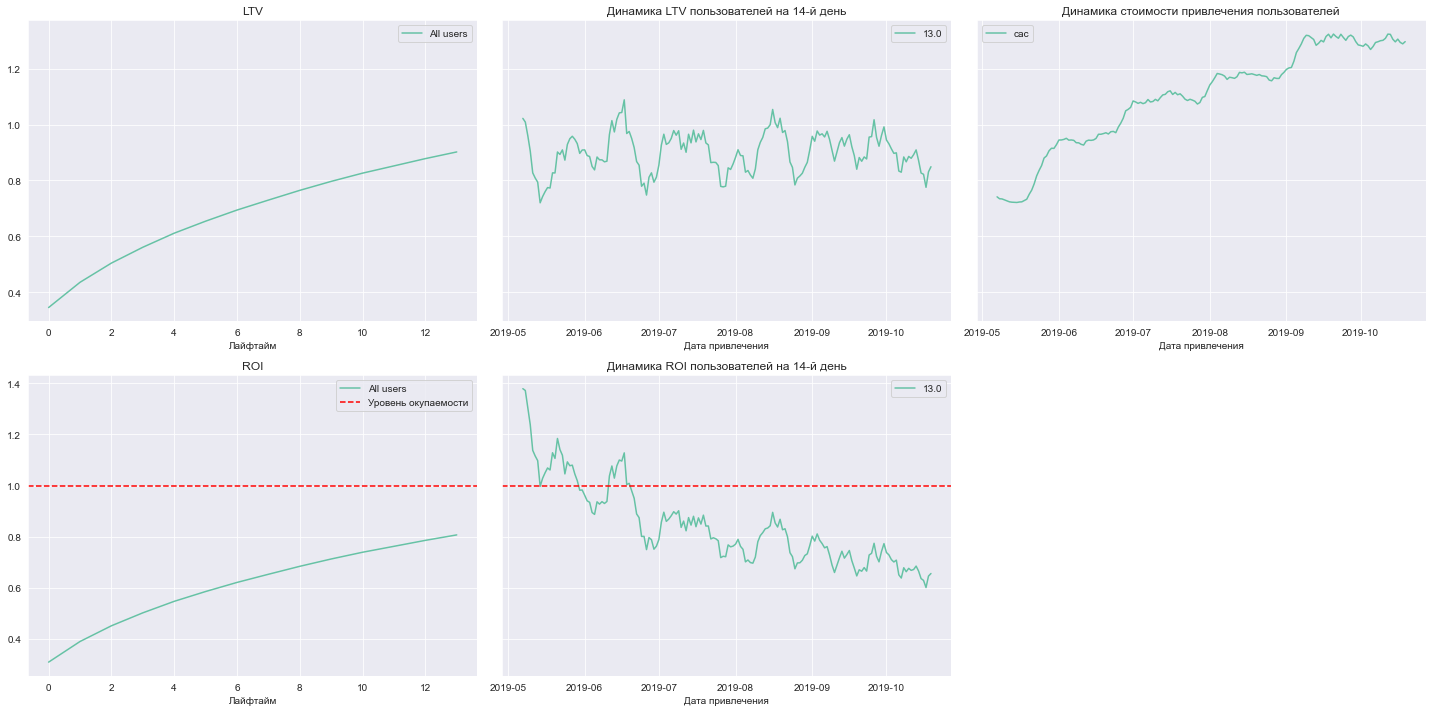

In [41]:
plot_ltv_roi(ltv, ltv_dynamics, roi, roi_dynamics, horizon_days)

По визуализации можем сказать следующее:
- ROI на 14 день только достигает 80%, т.е. реклама не окупается;
- LTV достаточно стабилен в течение всего лайфтайма и к концу периода растет;
- Реклама перестала окупаться на второй месяц рассматриваемого периода (июнь), и прослеживается тенденция к дальнейшему снижению окупаемости. С учетом того, что наш продукт - развлекательное приложение, вряд ли это связано с сезонностью;
- При этом затраты на привлечение пользователей только растут с течением времени, что может влиять на окупаемость.

### Окупаемость по рекламным каналам

Построим аналогичную визуализацию с учетом каналов привлечения пользователей.

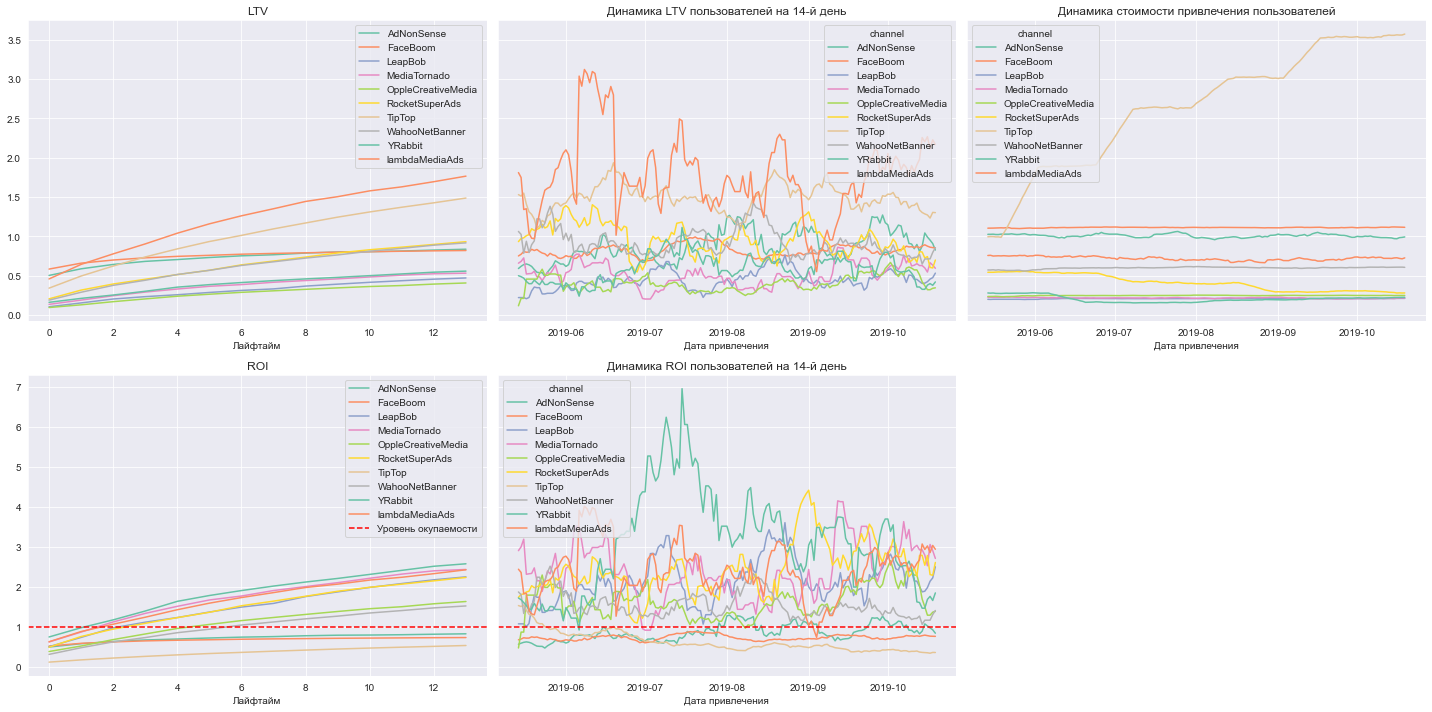

In [42]:
# задаем разрез по источнику
dimensions = ['channel']

result, ltv, ltv_dynamics, roi, roi_dynamics = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv, ltv_dynamics, roi, roi_dynamics, horizon_days, window=14
)

На графике динамики стоимости привлечения пользователей видим знакомую картину: канал `TipTop` стоит странных денег и от месяца к месяцу стоимость только увеличивается. Такие высокие затраты могут "портить" окупаемость в целом.  
По графику ROI можем также увидеть, что при этих затратах канал `TipTop` находится ниже уровня окупаемости, и там же находятся еще два источника с высокими затратами на привлечение:  `AdNonSense` и `FaceBoom`. Судя по динамике, окупаться они и не начнут, поэтому нет смысла вкладывать в них деньги.

### Окупаемость по странам

Проверим, есть ли разница в окупаемости по регионам.

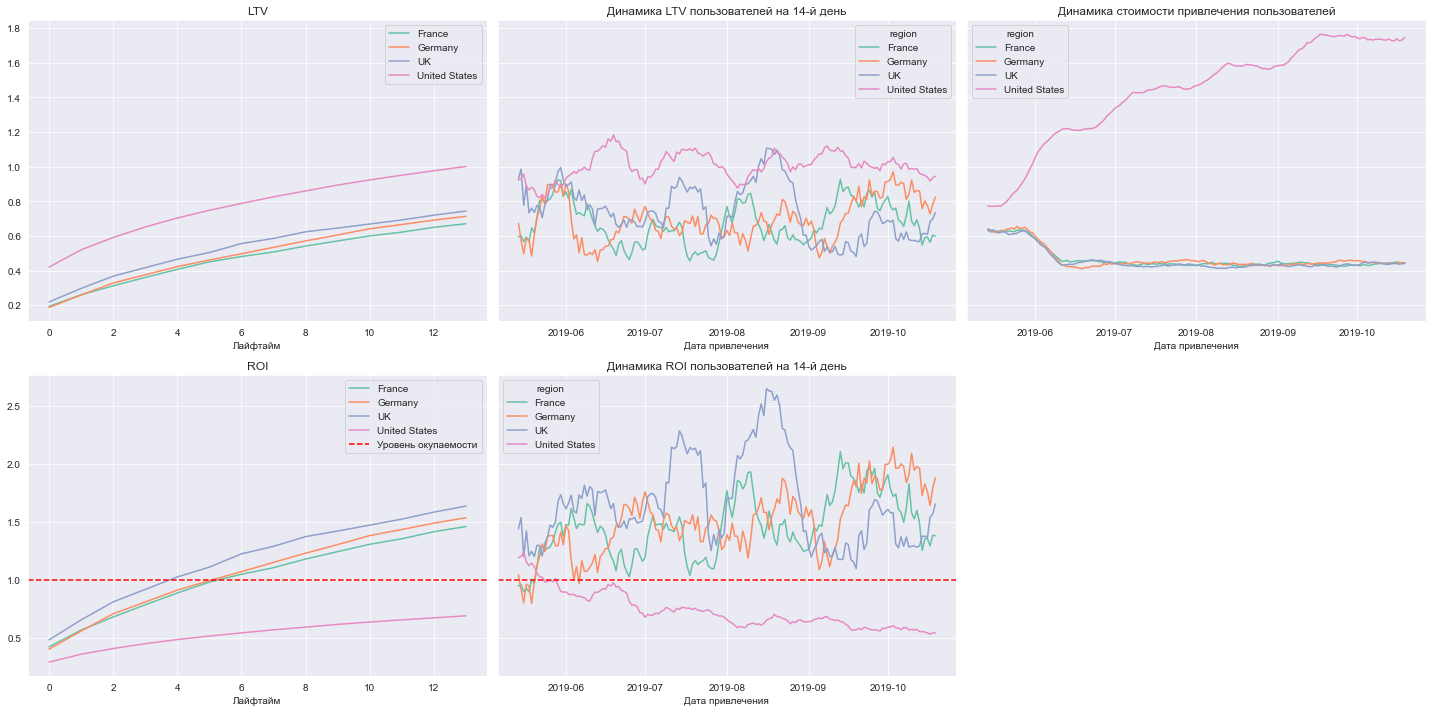

In [43]:
dimensions = ['region']

result, ltv, ltv_dynamics, roi, roi_dynamics = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv, ltv_dynamics, roi, roi_dynamics, horizon_days, window=14
)

По графикам видим, что США идет своим путем, и не в сторону прибыльности: при том, что выручка в этом регионе выше, чем в других, затраты на рекламу там стремительно растут, и в итоге окупаемость достигает всего 60%. По всем остальным регионам ROI стабилен и превышает установленный уровень CAC, и судя по динамике, не опускается ниже этого уровня в течение лайфтайма. Затраты на привлечение пользователей по всем другим регионам снижаются со временем, а выручка стабильна.  
Проверим, что за источники находятся в США, и не в США ли находятся наши убыточные каналы:

In [44]:
# делаем срез по стране США из отфильтрованной таблицы с профилями
usa = profiles_filtered.query('region == "United States"')
# строим сводную таблицу по источникам и средней стоимости привлечения пользователя
usa_channel = usa.pivot_table(index = 'channel', values = 'acquisition_cost').reset_index()
usa_channel.sort_values(by = 'acquisition_cost', ascending = False)

,channel,acquisition_cost
3,TipTop,2.799003
0,FaceBoom,1.113286
2,RocketSuperAds,0.412095
4,YRabbit,0.218975
1,MediaTornado,0.218717


Два из трех самых затратных источников попали в список, вероятно, дело все-таки в них. Рекламные каналы редко используются в какой-то одной стране, поэтому построим сводную таблицу по источникам и странам:

In [45]:
by_country = profiles_filtered.pivot_table(index = 'channel', columns = 'region', values = 'acquisition_cost').reset_index()
by_country

region,channel,France,Germany,UK,United States
0,AdNonSense,1.007553,1.008435,1.008224,NaN
1,FaceBoom,NaN,NaN,NaN,1.113286
2,LeapBob,0.210189,0.210380,0.209983,NaN
3,MediaTornado,NaN,NaN,NaN,0.218717
4,OppleCreativeMedia,0.249862,0.250091,0.250059,NaN
5,RocketSuperAds,NaN,NaN,NaN,0.412095
6,TipTop,NaN,NaN,NaN,2.799003
7,WahooNetBanner,0.602200,0.602161,0.602361,NaN
8,YRabbit,NaN,NaN,NaN,0.218975
9,lambdaMediaAds,0.721211,0.726176,0.727142,NaN


Канал `AdNonSense` используется везде кроме США, суммарные затраты по нему снижались, и он находится ближе всех к границе окупаемости (90%), поэтому у него есть шанс восстановить свою репутацию в следующих периодах. Источники `FaceBoom` и `TipTop` напротив используются только в США, вероятно из-за них окупаемость по этому региону такая низкая. Три других источника из США имеют стабильные показатели выручки и окупаемости.

### Окупаемость по устройствам

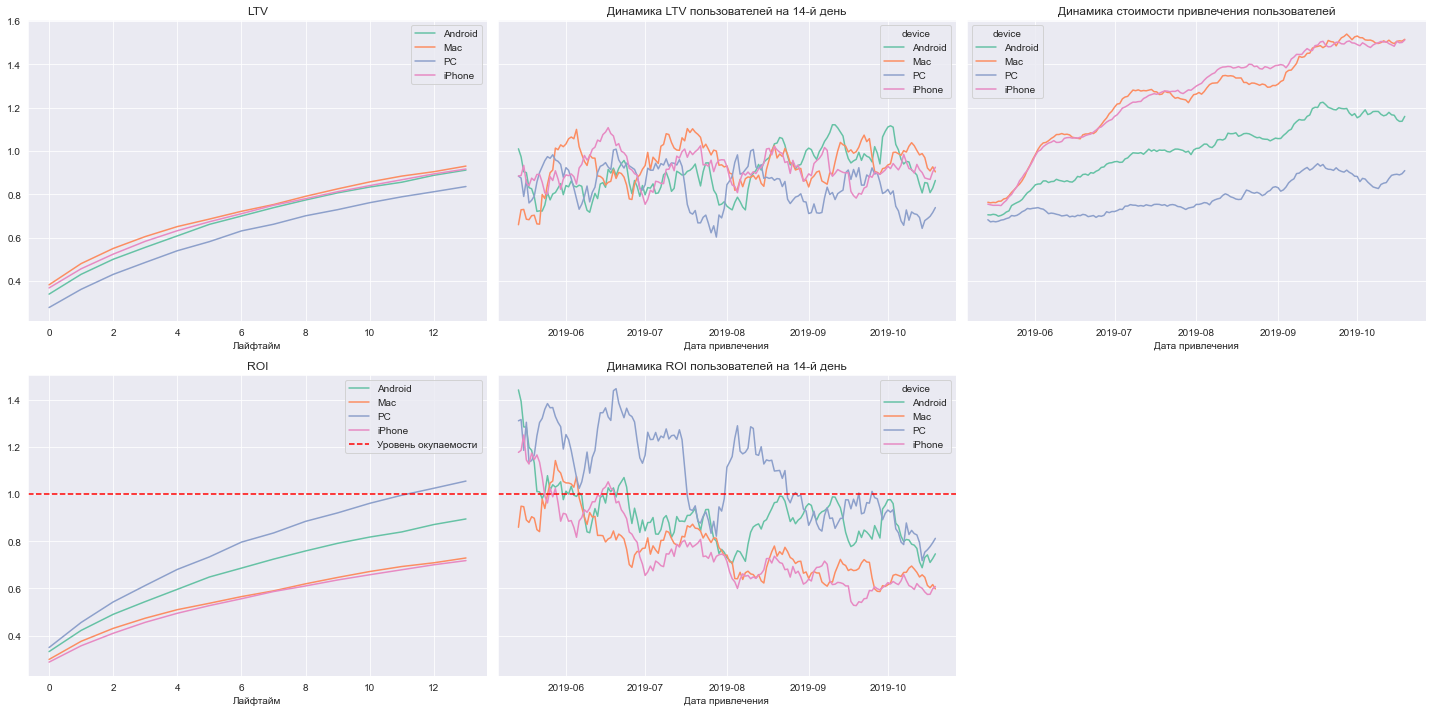

In [46]:
dimensions = ['device']

result, ltv, ltv_dynamics, roi, roi_dynamics = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv, ltv_dynamics, roi, roi_dynamics, horizon_days, window=14
)

Пара интересных моментов: пользователи Mac и iPhone внезапно окупаются хуже всех. А вот ROI пользователей PC, несмотря на самый небольшой процент платящих пользователей даже превышает установленный уровень окупаемости.   
При этом LTV по этим устройствам самый низкий, как и стоимость привлечения пользователей. С учетом того, что таких пользователей много, это направление перспективно, и его можно развивать.

### Конверсия и удержание

#### Конверсия

Используем функцию `get_conversion` для расчета конверсии, а затем визуализируем полученные данные.  
По источникам:

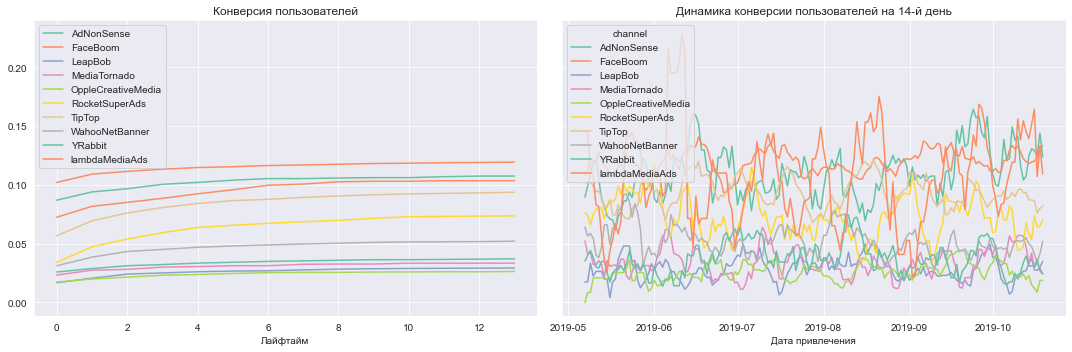

In [47]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_dynamics = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_dynamics, horizon_days) 

Здесь все стабильно, внимания заслуживает тот факт, что конверсия по двум самым дорогим источникам `AdNonSense` и `Faceboom` самая высокая и находится на уровне 10%, а вот по каналу `TipTop` значительно ниже.
Посмотрим на конверсию по странам:

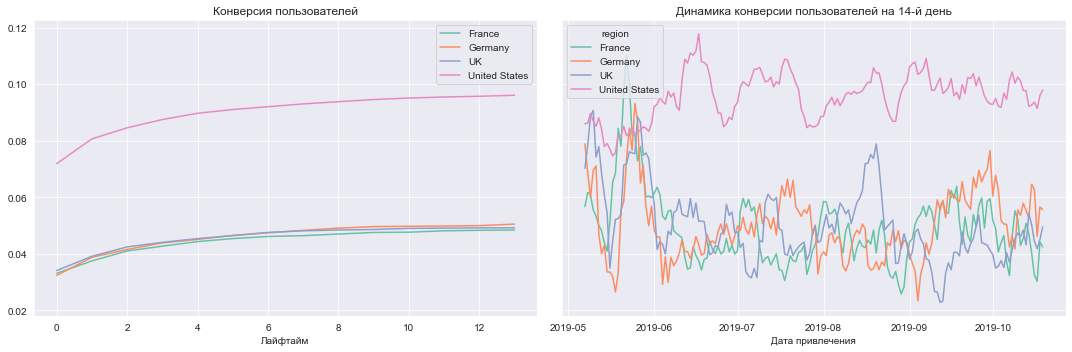

In [48]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_dynamics = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_dynamics, horizon_days) 

Конверсия пользователей из США лидирует с большим отрывом. Вероятно, это связано с тем, что там больше всего платящих пользователей, как мы выяснили в начале. По всем другим странам конверсия также стабильна и не превышает 5%.  
Посмотрим, нет ли различий по используемым устройствам:

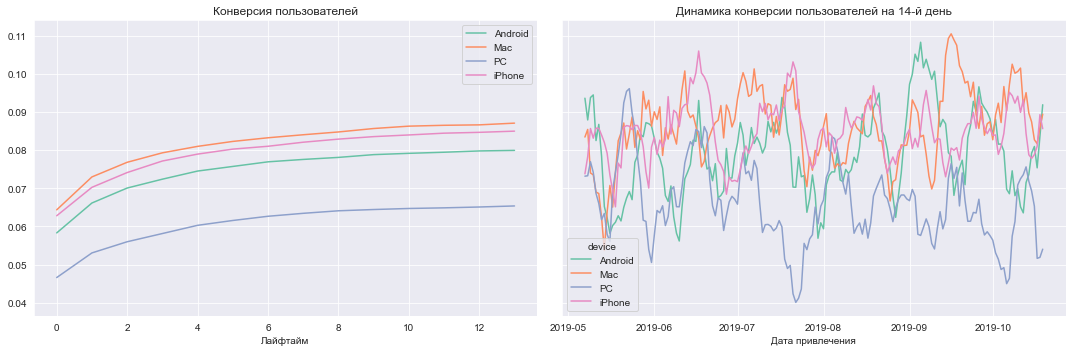

In [49]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_dynamics = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_dynamics, horizon_days) 

По графикам видим, что конверсия пользователей, использующих компьютер значительно ниже. Это ожидаемо, поскольку мы продаем мобильное приложение, и скорее всего рассчитываем, что пользователи будут использовать его с телефона, а значит, интерфейс настроен под мобильные устройства, и использовать его с ПК может быть неудобно.  
Доля платящих пользователей ПК была самой низкой, но при этом их количество сопоставимо с пользователями Mac: 30455 пользователей ПК против 30042 Mac. При таком раскладе имеет смысл доработать интерфейс, чтобы он был удобен для пользователей ПК тоже.  
В целом конверсия по всем группам достаточно стабильна и растет.

#### Удержание

Аналогичным образом используем функцию `get_retention` для расчета удержания, а затем визуализируем полученные данные.  
По источникам:

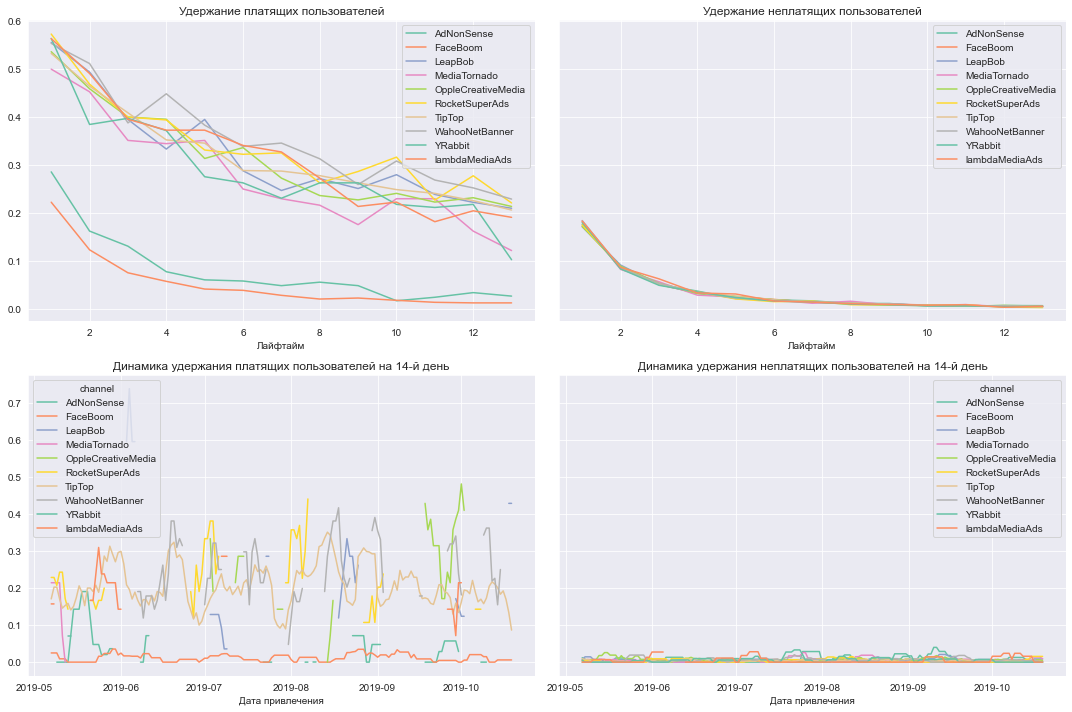

In [50]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_dynamics = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_dynamics, horizon_days)

Удержание и платящих, и неплатящих пользователей стабильно в течение лайфтайма. Выделяются снова два источника с наибольшими затратами на привлечение: теперь очевидно, что эти затраты не вполне оправданы, т.к. удержание пользователей из этих каналов значительно ниже, чем по другим.  
Посмотрим на динамику по странам:

И здесь видим, что удержание пользователей из США ниже, чем в других странах - 35% против 45%, что только подтверждает сделанные ранее выводы.  
Посмотрим на динамику удержания по устройствам:

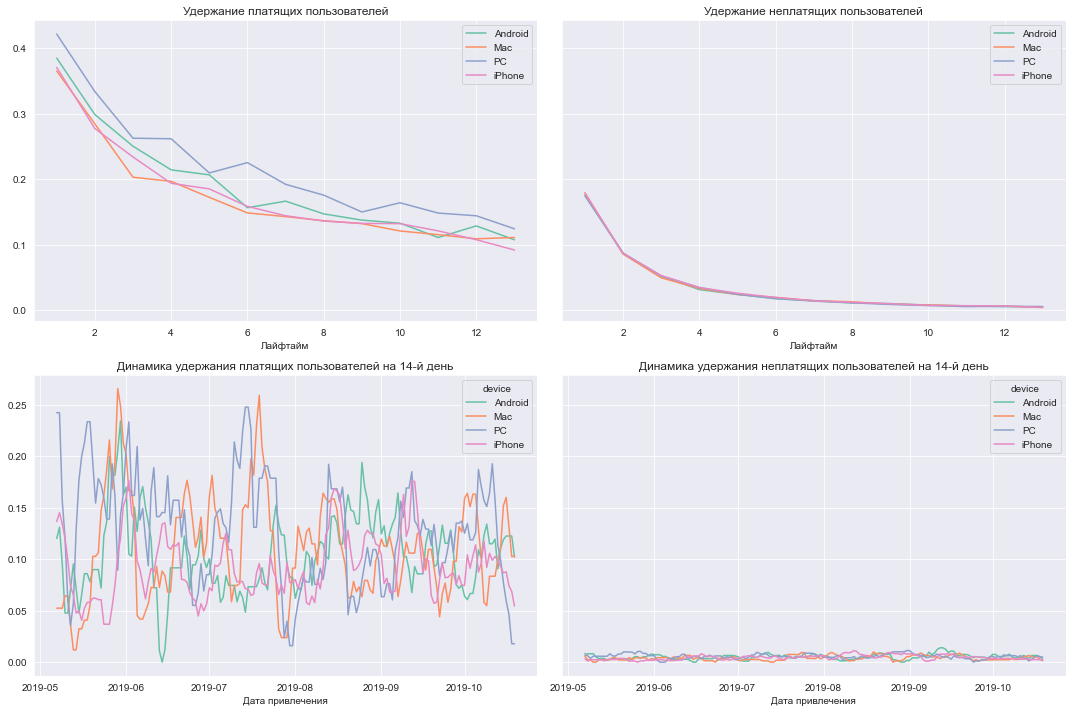

In [51]:
dimensions = ['device']
retention_raw, retention_grouped, retention_dynamics = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_dynamics, horizon_days)

А здесь особой разницы нет, пользователи всех устройств удерживаются достаточно стабильно.  
Из всего вышеперечисленного можем сделать вывод, что в целом реклама не окупается. Пользователи хорошо и стабильно конвертируются в платящих, а вот удерживаются уже не так хорошо. Сильнее всего на эти показатели влияют источники, и источниками вызваны различия по странам.  
Также, несмотря на стабильность удержания, пользователи ПК показывают низкую конверсию, вероятно, стоит доработать интерфейс.

## Выводы

Проанализировав поведение пользователей приложения из 4 стран можем сделать следующие выводы:

- Наибольшее количество пользователей находится в США (100002), и там же самая большая доля платящих пользователей (7%). На втором месте по количеству платящих пользователей находится Германия (4%), при том, что количество пользователей там минимальное по сравнению с другими странами (14981);  
- Большинство пользователей используют iPhone и устройства Android - 54479 и 35032 соответственно. При этом доля платящих пользователей самая высокая среди пользователей Mac (6%);  
- Критерии поиска настроены правильно, поскольку примерно половина пользователей самостоятельно нашла нас через поисковые системы (56439), однако доля платящих пользователей среди них минимальна (2%).  

Рассмотрев трафик в разрезе источников, получаем следующие результаты:  

- По большинству источников затраты распределяются равномерно, но два источника сильно выделяются: Tip Top и FaceBoom. Затраты по этим двум ресурсам превышают все остальные на старте и с течением времени растут.Источник AdNonSense демонстрирует даже некоторое снижение суммарных затрат;  
- Затраты на одного пользователя по источнику TipTop превышают все остальные и увеличиваются со временем (3,5). Источник FaceBoom по затратам на одного пользователя стабилен (1,1), как и источник AdNonSense (1);  

Проанализировав окупаемость в разрезе источников и стран, можем сказать, что:  

- Реклама в целом не окупается: ROI на 14 день только достигает 80%;  
- Значительно влияют на окупаемость высокие затраты по трем источникам: `TipTop`, `FaceBoom` и `AdNonSense`. При этом в динамике видим, что средние затраты на пользователя по каналу `TipTop` не только превышают все остальные ($3,5), но и постоянно растут. При этом окупаемость этого канала очень низкая (на уровне 60%). `FaceBoom` и `AdNonSense` также не окупаются, но их окупаемость приближается к 90%, а стоят они дешевле, поэтому имеет смысл перенаправить бюджет с `TipTop` на два других источника. На это же указывает тот факт, что конверсия по `AdNonSense` (12%) и `Faceboom`(11%) самая высокая, а вот по каналу `TipTop` ниже (8%);  
- Наблюдается снижение конверсии для пользователей ПК: она не превышает 6,5%, в то время как по другим устройствам в среднем составляет 8,3%. Вероятно, интерфейс настроен под мобильные устройства, и использовать его с ПК может быть неудобно. Доля платящих пользователей ПК была самой низкой (5%), но при этом их количество сопоставимо с пользователями Mac: 30455 пользователей ПК против 30042 Mac, что может быть связано с неудобствами или техническими проблемами. При таком раскладе имеет смысл доработать интерфейс, чтобы он был удобен для пользователей ПК тоже;  
- Удержание и платящих, и неплатящих пользователей стабильно в течение лайфтайма, однако пользователи конвертируются в платящих хорошо, но затем уходят. При этом удержание по источникам `Faceboom` и `AdNonSense` значительно ниже, чем по другим и составляет 22% и 29% соответственно, в то время как по остальным источникам удержание составляет от 50% до 55%.  

Из всего вышеперечисленного следует, что от источника `TipTop` можно отказаться, а освободившийся бюджет направить на удержание пользователей из каналов `Faceboom` и `AdNonSense`, т.к. их окупаемость растет, и они близки к тому, чтобы окупиться. Это также поможет повысить окупаемость по региону США, т.к. в целом конверсия по этому региону самая высокая, а значит, вложения в рекламу там оправданы.